# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [4]:
df=pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


#### 1. Is the distribution of body temperatures normal?

We calculate the descriptive statisitics for the variable temperature. This includes finding the mean, median, mode, standard deviation, skewness and kurtosis. Since, the mean = median = mode and the values of skewness and kurtosis are approximately equal to zero (within 1 to -1), we can say that the distrubution of body temperatures is normal.

In [7]:
median=df['temperature'].median()

In [8]:
median

98.3

In [9]:
mean=df['temperature'].mean()

In [10]:
mean

98.24923076923078

In [11]:
mode=df['temperature'].mode()

In [12]:
mode

0    98.0
dtype: float64

In [13]:
skewness=df['temperature'].skew()

In [14]:
skewness

-0.0044191311689957711

In [15]:
kurtosis=df['temperature'].kurt()

In [16]:
kurtosis

0.78045739503373746

Plotting Kernel Density Estimation for temperature variable, we see it follows a normal distribution

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


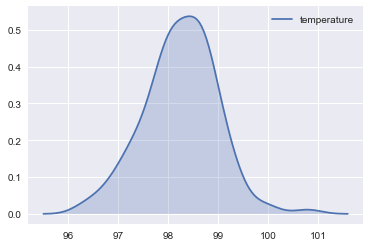

In [17]:
sns.kdeplot(df.temperature,shade=True)

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


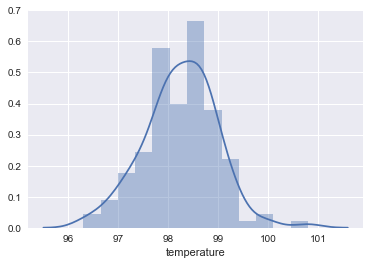

In [18]:
sns.distplot(df.temperature)

To check normality, we perform shapiro wilk test where our null hypothesis is that temperature is normally distributed

In [19]:
test_statistic,p_value=stats.shapiro(df.temperature)

In [20]:
print("t statistics:",test_statistic)
print("p value :",p_value)

t statistics: 0.9865769743919373
p value : 0.2331680953502655


Since p value is greater than 0.05, we cannot reject the null hypothesis and thus prove that temperature is normally distributed

#### 3. Is the true population mean really 98.6 degrees F

Null hypothesis,H0: True population mean is 98.6
    Alternate hypothesis, H1: Population mean is less than 98.6

We use one sample test because standard deviation is unknown

In [21]:
smean=df['temperature'].mean()

In [22]:
mean

98.24923076923078

Performing t statistics

In [23]:
test_statistic,p_value=stats.stats.ttest_1samp(df.temperature,98.6)

In [24]:
print("t statistics:",test_statistic)
print("p value:",p_value)

t statistics: -5.45482329236
p value: 2.41063204156e-07


Since p value is greater than 0.05, we fail to reject the null hypothesis

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?

The standard deviation of sample disribution is standard error

In [25]:
std_error=df['temperature'].std()

In [26]:
std_error

0.7331831580389454

For 95% confidence interval, the critical z value is 1.96. We can calculate the Margin of error by multiplying this critical value with the standard error

In [27]:
margin_e=1.96*std_error

In [28]:
margin_e

1.437038989756333

The confidence interval is obtaines as:

In [29]:
CI = [mean - 1.437, mean + 1.437]
CI

[96.81223076923078, 99.68623076923078]

Any temperature that falls outside these points are considered as abnormal

#### 5. Is there a significant difference between males and females in normal temperature?

Null Hypothesis,H0: There is no difference between males and females temperatures
    
Alternates Hypothesis,H1: There is a difference between males and females temperatures

In [56]:
male= df[df['gender']=='M']['temperature']

In [93]:
female=df[df['gender']=='F']['temperature']

In [94]:
male_count=male.count()

In [95]:
male_count

65

In [96]:
male_mean= male.mean()

In [97]:
stdm= male.std()
stdm

0.6987557623265908

In [98]:
female_count=female.count()
female_count

65

In [99]:
male_mean=males.mean()

In [100]:
female_mean = female.mean()

In [101]:
female_mean=female.mean()

In [102]:
stdf=female.std()
stdf

0.7434877527313665

We want to know the difference between female and male temperatures, Therefore we perform two sided test

In [103]:
t_statistic, p_value = stats.stats.ttest_ind(male, female, equal_var=False)
print("t statistic is:" ,t_statistic)
print("P-value is:" ,p_value)

t statistic is: -2.28543453817
P-value is: 0.0239382641829


Since the Pvalue is less than 0.05, We reject the null hypothesis and conclude that there is a difference between the temperatures of both